# Load Modules

In [1]:
# import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
# read in all data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# set seed for reproducibility
np.random.seed(0)

# Exploratory Data Analysis (EDA) on Training Data

## Understanding the Variables

In [4]:
# understand the variables in train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# find how the data is represented
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Values

In [6]:
# get the number of missing values in the train data
missing_value_counts_train_data = train_data.isnull().sum()
missing_value_counts_train_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
(missing_value_counts_train_data / len(train_data.index)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# percent of train data that are missing
total_train_data_cells = np.product(train_data.shape)
total_missing_train_data = missing_value_counts_train_data.sum()
percent_missing_train_data = (total_missing_train_data / total_train_data_cells) * 100
percent_missing_train_data

8.099513655069211

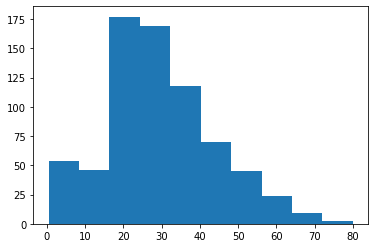

In [11]:
plt.hist(train_data['Age'])
plt.show()

In [12]:
# remove the cabin column from train and test data
del train_data['Cabin']

In [13]:
# replace all NA's with mean in the Age column
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [14]:
# remove the rest of NAs
train_data.dropna(inplace=True)

In [15]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Removing Duplicate Enteries

In [16]:
train_data.drop_duplicates(inplace=True)

### Dealing with Categorical Variables

In [17]:
del train_data['Name']
del train_data['Ticket']

In [18]:
train_data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [19]:
sex = pd.get_dummies(train_data['Sex'])

In [20]:
train_data = train_data.join(sex)

In [21]:
train_data.drop('Sex', axis=1, inplace=True)

In [22]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
embarked = pd.get_dummies(train_data['Embarked'])

In [24]:
train_data = train_data.join(embarked)

In [25]:
train_data.drop(['Embarked'], axis=1, inplace=True)

## Exploring the Dependent Variable

In [26]:
train_data['Survived'].describe()

count    889.000000
mean       0.382452
std        0.486260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## Investigating the Relationships Between Dependent & Independent Variables

In [27]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.089434,0.089434,0.033853,-0.012823,-0.021589
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
female,-0.043136,0.541585,-0.127741,-0.089434,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,0.043136,-0.541585,0.127741,0.089434,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,0.033853,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


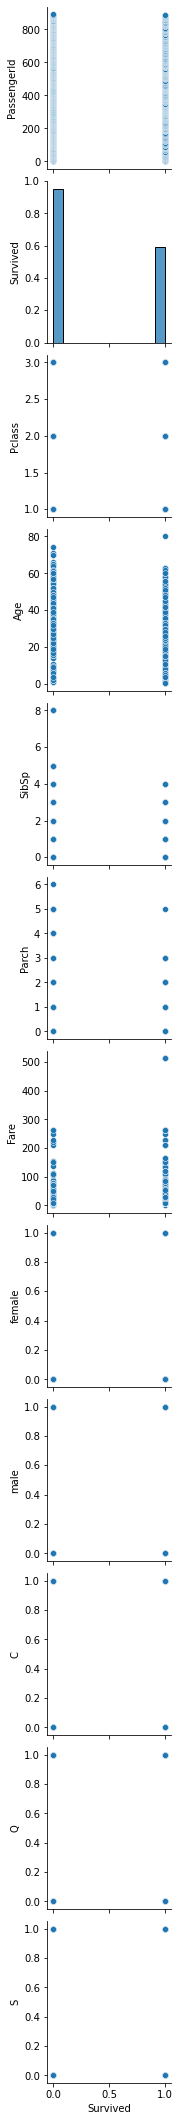

In [28]:
sns.pairplot(train_data, x_vars='Survived', y_vars=list(train_data.columns))

## Data Cleaning

<AxesSubplot:xlabel='female', ylabel='Survived'>

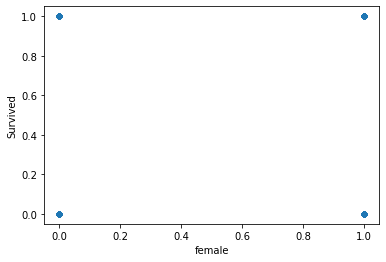

In [29]:
# create separate plots for each variable and remove outliers
train_data.plot.scatter(x='female', y='Survived')

## Checking Statistical Assumptions

<AxesSubplot:xlabel='male', ylabel='Count'>

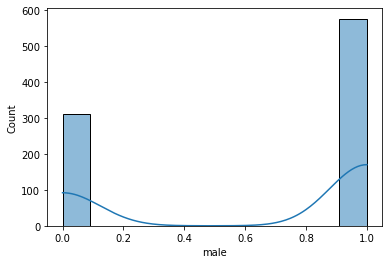

In [30]:
# check the normality of the variable
sns.histplot(train_data['male'], kde=True)

# Exploratory Data Analysis (EDA) on Test Data

## Understanding the Variables

In [31]:
# understand the variables in test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Handling Missing Values

In [33]:
# get the number of missing values in the test data
missing_value_counts_test_data = test_data.isnull().sum()
missing_value_counts_test_data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
(missing_value_counts_test_data / len(test_data.index)) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [35]:
# percent of test data that are missing
total_test_data_cells = np.product(test_data.shape)
total_missing_test_data = missing_value_counts_test_data.sum()
percent_missing_test_data = (total_missing_test_data / total_test_data_cells) * 100
percent_missing_test_data

9.00391474554154

In [36]:
# remove the cabin column from train and test data
del test_data['Cabin']

In [37]:
# replace all NA's with mean in the Age column
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [38]:
# remove the rest of NAs
test_data.dropna(inplace=True)

In [39]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Removing Duplicate Enteries

In [40]:
test_data.drop_duplicates(inplace=True)

### Dealing with Categorical Variables

In [41]:
del test_data['Name']
del test_data['Ticket']

In [42]:
sex_test = pd.get_dummies(test_data['Sex'])

In [43]:
test_data = test_data.join(sex_test)

In [44]:
test_data.drop(['Sex'], axis=1, inplace=True)

In [45]:
embark_test = pd.get_dummies(test_data['Embarked'])

In [46]:
test_data = test_data.join(embark_test)

In [47]:
test_data.drop(['Embarked'], axis=1, inplace=True)

# Data Transformation

In [48]:
features = list(test_data.columns)

In [49]:
X_train = train_data[features]
y_train = train_data['Survived']

In [50]:
X_test = test_data

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [52]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classification

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train_scaled, y_train)

LogisticRegression()